In [2]:
import pandas as pd #pandas for data processing
import numpy as np #numpy for array processing
import matplotlib.pyplot as plt #matplotlib for plotting 
import seaborn as sns #seaborn for data visualization

In [5]:
%matplotlib inline

In [3]:
cf1=pd.read_csv("Customers_info.csv") #Read the csv data file

In [91]:
cf1.head() #look at the first few entries

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


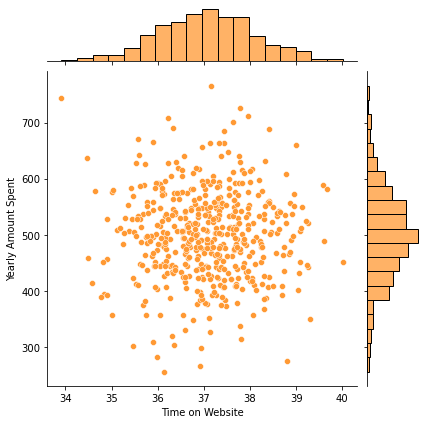

In [92]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=cf1,color='#ff9933') #view Yearly Amount spent vs Time on Website

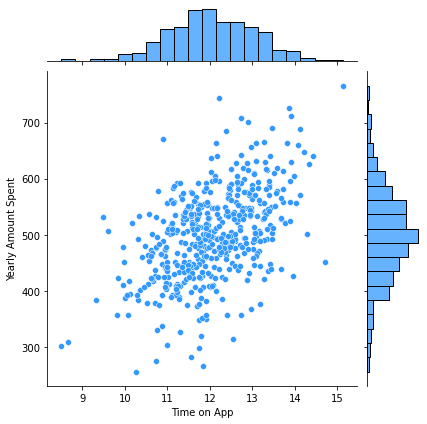

In [93]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=cf1,color='#3399ff') #view Yearly Amount spent vs Time on App

In [94]:
cf1.info() #to check type of attributes and their count 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [95]:
cf1.describe() #to check common stats

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


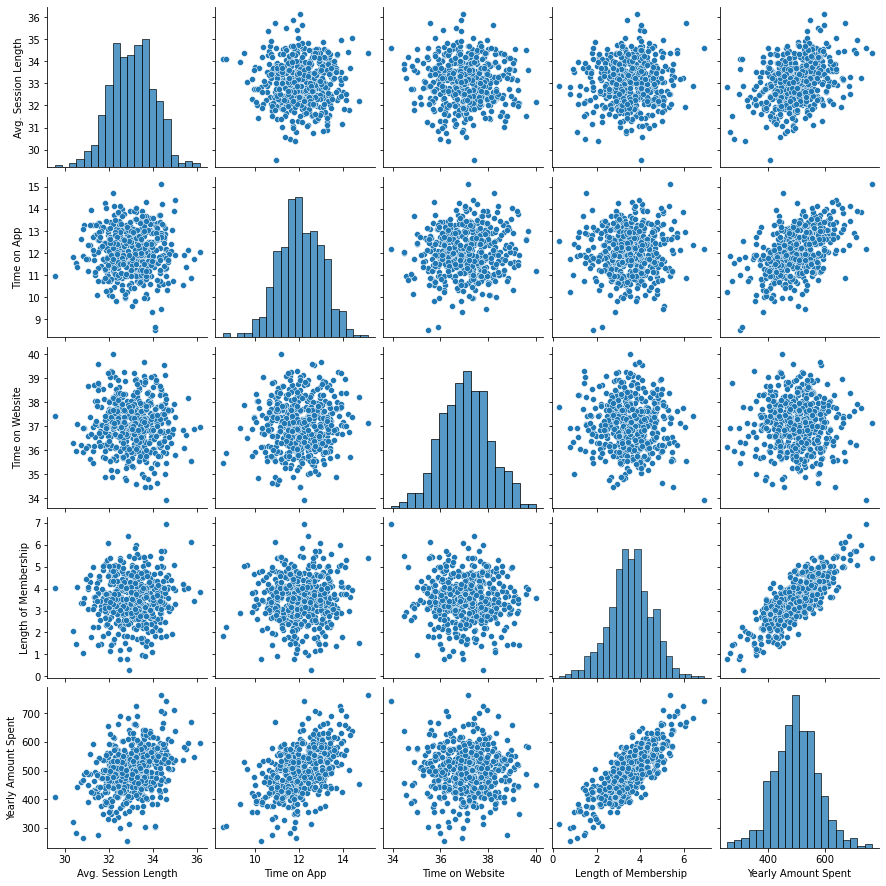

In [96]:
sns.pairplot(cf1) #multiple pairwsie bivariate distribution

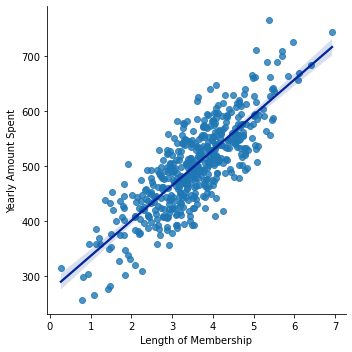

In [97]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=cf1,line_kws={'color':'#002699'}) #view Yearly Amount spent vs Length of Membership

In [98]:
from sklearn.model_selection import train_test_split #sklearn for train test split
from sklearn.linear_model import LinearRegression #performing Linear Regression

In [99]:
y = cf1['Yearly Amount Spent'] #dependent variables
x = cf1[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']] #independent variables

In [100]:
#Performing train test split on data and applying Linear Regression
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)
lm = LinearRegression()

In [101]:
lm.fit(X_train,y_train) #train the model

LinearRegression()

In [102]:
test_res = lm.predict(X_test) #predicting on test data

Text(0, 0.5, 'Predicted Y')

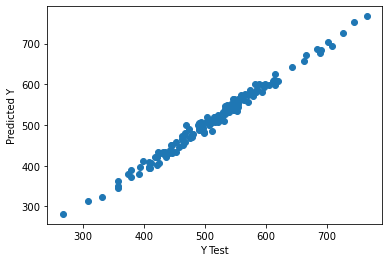

In [103]:
#actual test values vs predicted values
plt.scatter(y_test,test_res)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [104]:
# calculating the metrics
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_res))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_res))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_res)))

Mean Absolute Error: 7.896670984962893
Mean Squared Error: 93.8309700287731
Root Mean Squared Error: 9.686638737393539


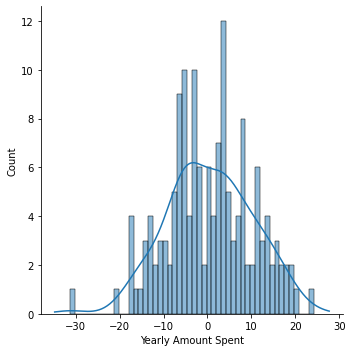

In [105]:
sns.displot((y_test-test_res),bins=50,kde=True,kde_kws={"cut": 1}) #residuals normally distributed

In [106]:
print('Coefficients: \n', lm.coef_) #displaying the obtained coefficients

Coefficients: 
 [25.89535967 38.84416514  0.9679482  61.86922459]


In [107]:
#Interpreting coefficients
coeffecients = pd.DataFrame(lm.coef_,x.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.895360
Time on App,38.844165
Time on Website,0.967948
Length of Membership,61.869225
